In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## Modify these two variables
log_folder_path = "logs/test10/"
dim = 128
## It should report file not found error if dim is wrong.

after_diffusion_external_dist = torch.Tensor(torch.load(log_folder_path + "{}d_external_dist.pt".format(dim))).cpu().numpy()
after_diffusion_internal_dist = torch.Tensor(torch.load(log_folder_path + "{}d_internal_dist.pt".format(dim))).cpu().numpy().reshape((-1,1))
after_SAGA_encode_external_dist = torch.Tensor(torch.load(log_folder_path + "orignal_external_dist_mean.pt")).cpu().numpy()
after_SAGA_encode_internal_dist = torch.Tensor(torch.load(log_folder_path + "orignal_internal_dist_mean.pt")).cpu().numpy().reshape((-1,1))

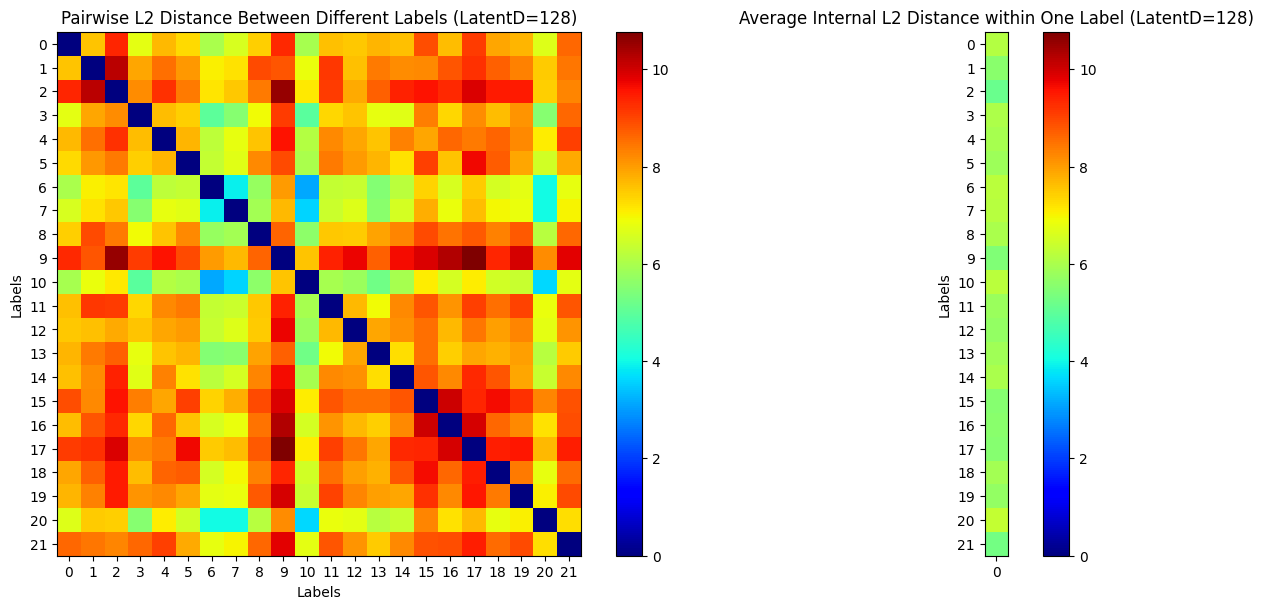

In [6]:
pairwise_distances = after_diffusion_external_dist  
new_distances = after_diffusion_internal_dist 

vmin = min(np.min(pairwise_distances), np.min(new_distances))
vmax = max(np.max(pairwise_distances), np.max(new_distances))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

im1 = ax1.imshow(pairwise_distances, cmap='jet', vmin=vmin, vmax=vmax)
ax1.set_title("Pairwise L2 Distance Between Different Labels (LatentD={})".format(dim))
ax1.set_xlabel("Labels")
ax1.set_ylabel("Labels")
ax1.set_xticks(np.arange(0, 22, 1))
ax1.set_yticks(np.arange(0, 22, 1))
cbar1 = fig.colorbar(im1, ax=ax1)


im2 = ax2.imshow(new_distances, cmap='jet', vmin=vmin, vmax=vmax)
ax2.set_title("Average Internal L2 Distance within One Label (LatentD={})".format(dim))
# ax2.set_xlabel("Data Point Index")
ax2.set_ylabel("Labels")
ax2.set_xticks(np.arange(0, 1, 1))
ax2.set_yticks(np.arange(0, 22, 1))
cbar2 = fig.colorbar(im2, ax=ax2)

plt.tight_layout()
plt.show()
